# Analogy between Logistic Regression and a Perceptron 

In the realm of machine learning, both Logistic Regression and Perceptron are foundational linear classifiers used for binary classification tasks. Despite their differences in implementation and objective functions, they share a common goal: to separate data into distinct classes using a linear decision boundary. The Perceptron, an early neural network model, classifies input data by applying a linear combination of features followed by a step function, whereas Logistic Regression extends this concept by using a sigmoid function to output probabilistic predictions.Understanding these models' analogies and differences provides insight into their respective advantages and limitations in various classification scenarios.

# Logistic Regression

In logistic regression the the output from a linear function is changed to by applying a logistic function (Sigmoid). The sigmoid function covert this output into probability of an object belonging to a class. This probability ranges from 0 to 1. 

![image](https://www.ejable.com/wp-content/uploads/2023/11/linear-regression-vs-logistic-regression-2.webp)

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <i>y</i>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Despite the name logistic <i>regression</i>, it is actually a <b>probabilistic classification</b> model. Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function:

$$
ProbabilityOfaClass = \theta(y) = \frac{e^y}{1 + e^y} = exp(y) / (1 + exp(y)) = p 
$$

which produces p-values between 0 (as y approaches minus infinity $-\infty$) and 1 (as y approaches plus infinity $+\infty$). This now becomes a special kind of non-linear regression.

In this equation, <i>y</i> is the regression result (the sum of the variables weighted by the coefficients), <code>exp</code> is the exponential function and $\theta(y)$ is the <a href="http://en.wikipedia.org/wiki/Logistic_function">logistic function</a>, also called logistic curve. It is a common "S" shape (sigmoid curve), and was first developed for modeling population growth.

You might also have seen this function before, in another configuration:

$$
ProbabilityOfaClass = \theta(y) = \frac{1}{1+e^{-y}}
$$


In [1]:
# importing useful libraries and resources for the lab
import pandas as pd 
import numpy as np
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim



In [2]:
# lets create a create a dataset to elaborate the above explanation of logistic regression
# Seed for reproducibility
np.random.seed(42)

n_samples = 100

# Generate random feature data
x_1 = np.random.normal(0, 1, n_samples)
x_2 = np.random.normal(0, 1, n_samples)

# Generate a continuous target variable with some noise
y = 3 * x_1 + 2 * x_2 + np.random.normal(0, 1, n_samples)

# Create a DataFrame
df = pd.DataFrame({
    'feature_1': x_1,
    'feature_2': x_2,
    'target': y
})

print(df.head())

   feature_1  feature_2    target
0   0.496714  -1.415371 -0.982812
1  -0.138264  -0.420645 -0.695299
2   0.647689  -0.342715  2.340688
3   1.523030  -0.802277  4.018337
4  -0.234153  -0.161286 -2.402701


In [3]:
# Now we are going to apply linear regression on this dataset 
x = df[['feature_1', 'feature_2']]
y = df['target']

linear_model = LinearRegression()
linear_model.fit(x, y)
ypred = linear_model.predict(x)

In [4]:
# lets define and apply sigmoid function to output from linear regression

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Apply the sigmoid function to the linear regression predictions
y_probabilities = sigmoid(ypred)

In [5]:
# since we are performing classification, we need to convert the probabilities into binary classes

threshold = 0.5
y_binary = (y_probabilities > threshold).astype(int)

# Add the binary target to the DataFrame
df['Class'] = y_binary

# Display the first few rows
print(df.head())

   feature_1  feature_2    target  Class
0   0.496714  -1.415371 -0.982812      0
1  -0.138264  -0.420645 -0.695299      0
2   0.647689  -0.342715  2.340688      1
3   1.523030  -0.802277  4.018337      1
4  -0.234153  -0.161286 -2.402701      0


In [6]:
# The probabilities from sigmoid has been converted into class 0 where probability was less than 0.5 and 1 where probability was greater than 0.5. 
df.head()

,feature_1,feature_2,target,Class
0,0.496714,-1.415371,-0.982812,0
1,-0.138264,-0.420645,-0.695299,0
2,0.647689,-0.342715,2.340688,1
3,1.523030,-0.802277,4.018337,1
4,-0.234153,-0.161286,-2.402701,0


**Binary Cross Entropy**

Binary cross entropy (also known as logarithmic loss or log loss) is a model metric that tracks incorrect labeling of the data class by a model, penalizing the model if deviations in probability occur into classifying the labels. Low log loss values equate to high accuracy values. Binary cross entropy is equal to -1*log(likelihood)

![Binary Cross Entropy](https://arize.com/wp-content/uploads/2022/11/log-loss-1.png)


In [7]:
# lets create a function to calculate the binary cross entropy 

def cross_entropy_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Calculate the cross-entropy loss
loss = cross_entropy_loss(df['Class'], y_probabilities)
print(f"Cross-Entropy Loss: {loss:.4f}")

Cross-Entropy Loss: 0.1997


# Perceptron

A perceptron is a basic unit of a neural network that makes decisions by combining inputs with weights, adding a bias, and then applying an activation function to produce an output.

**Key Components**

1. **Inputs**: Features or data points that are fed into the perceptron. Each input has an associated weight.

2. **Weights**: Values that are multiplied with the inputs. They determine the importance of each input feature.

3. **Bias**: A value added to the weighted sum of the inputs. It helps adjust the output along with the weights.

4. **Activation Function**: A function that transforms the weighted sum (plus bias) into an output. For a perceptron, this is typically a step function or a sigmoid function.

5. **Output**: The final decision or prediction made by the perceptron, usually as a binary class (0 or 1).

![Perceptron](https://www.simplilearn.com/ice9/free_resources_article_thumb/Perceptron/general-diagram-of-perceptron-for-supervised-learning_4.jpg)

In essence, a perceptron is a simple model that takes multiple inputs, processes them using weights and bias, applies an activation function, and produces an output. It’s a foundational concept in machine learning and neural networks, especially for binary classification tasks.


Now, we need to see how a single perceptron in deep learning can perform all of these above operations in one go and compare the results.

First, we will define a perceptron and then use pytorch to elaborate it using custom class model, where the each component of perceptron (input, weights, activation function (sigmoid) and loss function (cross entropy loss) will be defined.



In [8]:
df.head()

,feature_1,feature_2,target,Class
0,0.496714,-1.415371,-0.982812,0
1,-0.138264,-0.420645,-0.695299,0
2,0.647689,-0.342715,2.340688,1
3,1.523030,-0.802277,4.018337,1
4,-0.234153,-0.161286,-2.402701,0


In [9]:
X = torch.tensor(df[['feature_1', 'feature_2']].values, dtype=torch.float32)
y_binomial = torch.tensor(df['Class'].values, dtype=torch.float32)

# lets split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y_binomial, test_size=0.2, random_state=42)


In [10]:
# time to define a perceptron 
# Since we have discussed how cross entroy and signmoid works - here only built-in functions are used

class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(2, 1)  # 2 input features, 1 output

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

# Initialize the model, loss function, and optimizer
model = Perceptron()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1) # training with stochastic-gradient descent

In [11]:
# training the model
n_epochs = 1000
losses = []

for epoch in range(n_epochs):
    model.train()
    
    y_pred = model(X_train).squeeze()
    
    # our criterion has been set to cross-entropy loss
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    
    # Backward propagation optimizes the weights and biases in deep learning 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


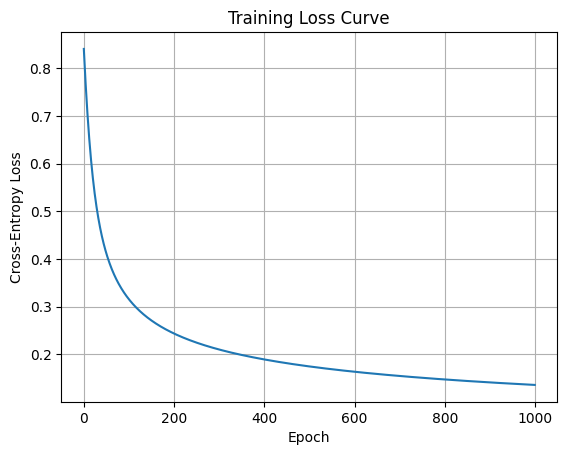

In [12]:
# Plot the loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()


In [13]:
# lets extract the min loss the perceptron has achieved
min(losses)

0.13558900356292725

# Results and Discussions:

* In simple Logistic Regression we had Cross_Entropy = 0.1997 and in Perceptron the Cross_Entropy = 0.1355.

* Perceptron outputs a binary classification directly, while Logistic Regression outputs probabilities and then makes a classification based on a threshold.

* Both Perceptron and Logistic Regression are linear classifiers, meaning they make predictions based on a weighted sum of the input features plus a bias term.

* Both models learn weights and a bias term through their training processes. These parameters define the decision boundary or the probability function.
 
* The main difference is in their activation functions and the way they learn from data. Logistic Regression uses the sigmoid function and minimizes Cross-Entropy loss, making it probabilistic. Perceptron uses a step function and is trained based on misclassification errors.